In [7]:
#!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#!pip install pyngrok


In [10]:
#!pip install folium

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
data = pd.read_csv(r"/content/drive/MyDrive/final_data.csv")

In [ ]:
data.head()

,review_rate,review_text,object_address,overall_rating,review_num,object_url,date_complete,postal_code,year,latitude_longitude,latitude,longitude,sentiment
0,1,agent daccueil lentr tr bien personn derrir bu...,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,janvier 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
1,5,aujourdhui vendredi coup h venu cpam dame brun...,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
2,1,dj horair born pann,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
3,1,agent san professionnalism interromp parol man...,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,mars 2021,75012,2021.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
4,5,merci personnel accueil chaleureux,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,décembre 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative


In [ ]:
arrondissements = sorted(data["postal_code"].unique())
annees = sorted(data["year"].unique())
print(arrondissements,annees)

[75010, 75011, 75012, 75013, 75014, 75015, 75017, 75018, 75019, 75020] [2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, nan]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.4/423.4 kB 11.5 MB/s eta 0:00:00


In [80]:
%%writefile projet_entreprise.py

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import folium
from streamlit_folium import folium_static

data = pd.read_csv("/content/drive/MyDrive/final_data.csv")

import streamlit as st
import folium
from streamlit_folium import folium_static
import pandas as pd
import matplotlib.pyplot as plt

# Calcul des statistiques pour chaque arrondissement
stats = data.groupby('postal_code').agg({
    'sentiment': lambda x: (x == 'Positive').mean() * 100,  # Pourcentage des avis positifs
    'review_rate': 'mean',  # Moyenne des avis
    'overall_rating': 'mean'  # Moyenne des overall ratings
}).reset_index()

# Créer une carte Folium centrée sur Paris
paris_coordinates = [48.8566, 2.3522]  # Coordonnées de Paris
m = folium.Map(location=paris_coordinates, zoom_start=12)

# Ajouter des marqueurs pour chaque arrondissement avec les statistiques dans la fenêtre contextuelle
for index, row in stats.iterrows():
    arrondissement = row['postal_code']
    latitude = data.loc[data['postal_code'] == arrondissement, 'latitude'].iloc[0]
    longitude = data.loc[data['postal_code'] == arrondissement, 'longitude'].iloc[0]
    popup_text = f"Arrondissement {arrondissement}<br>"
    sentiment_percentage = row['sentiment']
    overall_rating_mean = row['overall_rating']
    popup_text += f"Pourcentage d'avis positifs: {sentiment_percentage:.2f}%<br>"
    popup_text += f"Pourcentage d'avis négatifs: {100 - sentiment_percentage:.2f}%<br>"
    popup_text += f"Moyenne des overall ratings: {overall_rating_mean:.2f}"
    folium.Marker(
        location=[latitude, longitude],
        popup=popup_text,
        tooltip=arrondissement
    ).add_to(m)

# Fonction pour afficher la page principale (carte + moyennes par arrondissement)
def show_main_page():
    st.markdown('<h1 align="center">Carte des Arrondissements de Paris</h1>', unsafe_allow_html=True)
    folium_static(m)

    st.markdown('<h2 align="center">Moyenne des Notes par Arrondissement</h2>', unsafe_allow_html=True)
    st.dataframe(stats)

# Fonction pour afficher le diagramme en camembert du pourcentage des avis positifs et négatifs
def show_pie_chart():
    selected_year = st.selectbox("Sélectionnez une année", data['year'].unique())
    selected_arrondissement = st.selectbox("Sélectionnez un arrondissement", data['postal_code'].unique())

    filtered_data = data[(data['year'] == selected_year) & (data['postal_code'] == selected_arrondissement)]
    positive_reviews = filtered_data[filtered_data['sentiment'] == 'Positive'].shape[0]
    negative_reviews = filtered_data[filtered_data['sentiment'] == 'Negative'].shape[0]

    fig, ax = plt.subplots()
    ax.pie([positive_reviews, negative_reviews], labels=['Positive', 'Negative'], autopct='%1.1f%%')
    ax.set_title('Pourcentage des Avis Positifs et Négatifs')
    st.pyplot(fig)

# Fonction pour afficher la distribution des review rates par année et par arrondissement
def show_review_rate_distribution():
    selected_year = st.selectbox("Sélectionnez une année", data['year'].unique())
    selected_arrondissement = st.selectbox("Sélectionnez un arrondissement", data['postal_code'].unique())

    filtered_data = data[(data['year'] == selected_year) & (data['postal_code'] == selected_arrondissement)]
    
    if len(filtered_data) > 0:
        st.markdown(f"**Distribution des Review Rates pour l'année {selected_year} et l'arrondissement {selected_arrondissement}**")
        fig, ax = plt.subplots()
        ax.hist(filtered_data['review_rate'], bins='auto')
        ax.set_xlabel('Review Rate')
        ax.set_ylabel('Count')
        ax.set_title('Distribution des Review Rates')
        st.pyplot(fig)
    else:
        st.markdown("Aucune donnée disponible pour l'année et l'arrondissement sélectionnés.")



# Fonction pour afficher le line plot de la moyenne des overall ratings et review rate pour chaque année pour un arrondissement donné
def show_overall_rating_line_plot():
    selected_arrondissement = st.selectbox("Sélectionnez un arrondissement", data['postal_code'].unique())

    filtered_data = data[data['postal_code'] == selected_arrondissement]
    filtered_data = filtered_data.dropna(subset=['year'])

    st.markdown(f"**Moyenne des Overall Ratings et Review Rate pour l'arrondissement {selected_arrondissement}**")

    # Convertir les années en chaînes de caractères
    filtered_data.loc[:, 'year'] = filtered_data['year'].astype(str)

    # Calcul de la moyenne des review rate par année
    review_rate_mean = filtered_data.groupby('year')['review_rate'].mean()
    overall_rating_mean = filtered_data.groupby('year')['overall_rating'].mean()

    # Création du line plot
    fig, ax = plt.subplots()
    ax.plot(review_rate_mean.index, review_rate_mean.values, label='Moyenne des Review Rates')
    ax.plot(overall_rating_mean.index, overall_rating_mean.values, label='Moyenne des Overall Ratings')
    ax.set_xlabel('Année')
    ax.set_ylabel('Moyenne')
    ax.set_title('Moyenne des Overall Ratings et Review Rates par Année')
    ax.legend()
    st.pyplot(fig)

# Liste des pages disponibles
pages = {
    "Page Principale": show_main_page,
    "Diagramme en Camembert - Avis Positifs/Négatifs": show_pie_chart,
    "Distribution des Review Rates": show_review_rate_distribution,
    "Line Plot - Moyenne des Overall Ratings": show_overall_rating_line_plot
}

# Affichage de la page sélectionnée
selected_page = st.sidebar.button("Page Principale")
if selected_page:
    show_main_page()

selected_page = st.sidebar.button("Diagramme en Camembert - Avis Positifs/Négatifs")
if selected_page:
    show_pie_chart()

selected_page = st.sidebar.button("Distribution des Review Rates")
if selected_page:
    show_review_rate_distribution()

selected_page = st.sidebar.button("Line Plot - Moyenne des Overall Ratings")
if selected_page:
    show_overall_rating_line_plot()



Overwriting projet_entreprise.py


In [ ]:
!streamlit run projet_entreprise.py & npx localtunnel --port 8501


[..................] \ fetchMetadata: sill resolveWithNewModule openurl@1.1.1 c


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.102.25:8501

npx: installed 22 in 2.222s
your url is: https://brown-nights-repair.loca.lt


In [ ]:
#!pip install streamlit --upgrade

Overwriting projet_entreprise.py


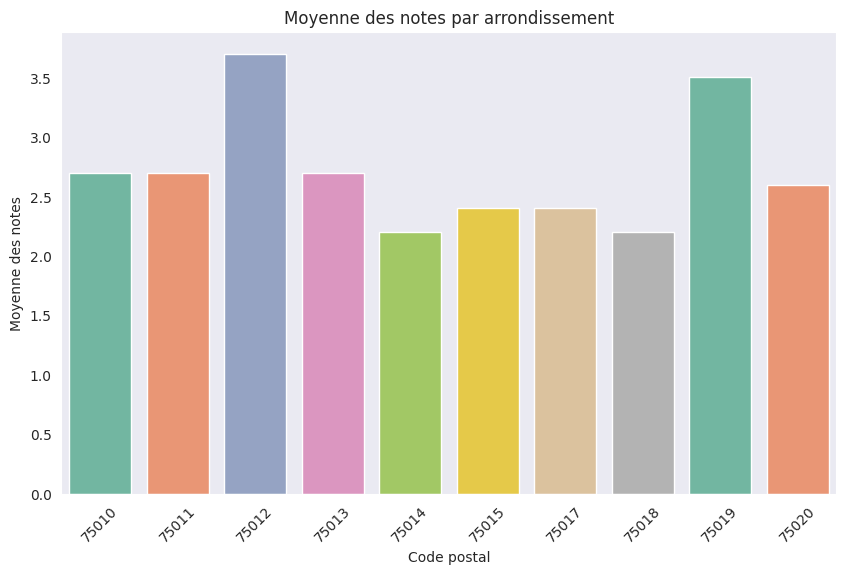

DeltaGenerator()

In [ ]:
moyenne_note=data.groupby("postal_code")["overall_rating"].first().reset_index()

# le classement des arrondissements
sns.set_style("dark")
plt.figure(figsize=(10, 6))  
sns.barplot(data=moyenne_note, x="postal_code", y="overall_rating",palette = "Set2")
plt.title("Moyenne des notes par arrondissement")
plt.xlabel("Code postal")
plt.ylabel("Moyenne des notes")
plt.xticks(rotation=45)  

# Afficher le graphique
plt.show()
st.pyplot(plt)

In [ ]:
#!streamlit run projet_entreprise.py&>/dev/null&

In [ ]:
#!pgrep streamlit

5097


In [ ]:
#public_url = ngrok.connect(port=8501)


In [ ]:
"""import streamlit as st
from pyngrok import ngrok

%%writefile projet_entreprise.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

!streamlit run projet_entreprise.py&>/dev/null&

!pgrep streamlit
public_url = ngrok.connect(port=8501)
"""

"import streamlit as st\nfrom pyngrok import ngrok\n\n%%writefile projet_entreprise.py\n\nimport streamlit as st\n\nst.write('Hello, *World!* :sunglasses:')\n\n!streamlit run projet_entreprise.py&>/dev/null&\n\n!pgrep streamlit\npublic_url = ngrok.connect(port=8501)\n"

In [ ]:
#!pip install pyngrok --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
public_url = ngrok.connect(port=8501)

In [ ]:
#!streamlit run /content/prjet_entreprise.py &>/content/logs.txt &

In [ ]:
#!npx localtunnel --port 8501